In [2]:
import os
import numpy as np
import pandas as pd
from importlib import reload
from dataclasses import *

import AvantgardeModelUtils
reload(AvantgardeModelUtils)
from AvantgardeModelUtils import *

In [3]:
attitude_shock_data = 0

In [5]:
path = "../data/shocks/affinity"
file = "data_seed100_p100_const_local.csv"


In [6]:
file = "../data/shocks/const/agent_shocks_test.csv"

attitudes = np.genfromtxt(file, delimiter=' ')

In [7]:
path = "../data/shocks/affinity"

# const shock random location = CSRL

def add_shock_file(df, attitudes, seed, n_shocked, directionality, scope, step_interval=10):
    step = 0
    for row in attitudes:
        row_data = {
            "step": step, 
            "seed": seed, 
            "n shocked": n_shocked,
            "attitude": row,
            "scope": scope,
            "directionality": directionality
        }
        df = pd.concat([df, pd.DataFrame([row_data])], ignore_index=True)
        step += step_interval
    return df


def is_valid(file):
    return "seed" in file and "_p" in file


attitude_shock_data = pd.DataFrame(columns=["step", "seed", "n shocked", "attitude", "scope", "directionality"])
for file in os.listdir(path):
    
    if not is_valid(file):
        
        print(f"skipped: {file}") # log
        
        # skip file
        continue
    
    seed = int(file.split("seed")[1].split("_")[0].split(".")[0])
    n_shocked = int(file.split("_p")[1].split("_")[0].split(".")[0])
    directionality = "random" if "random" in file else "constant" 
    scope = "local" if "local" in file else "global"
    attitudes = np.genfromtxt(f"{path}/{file}", delimiter=' ')
    
    attitude_shock_data = add_shock_file(attitude_shock_data, attitudes, seed, n_shocked, directionality, scope)

skipped: agent_shocks_test.csv
skipped: debug.log


In [8]:
np.unique(attitude_shock_data.get("n shocked"))

array([100, 500, 1000, 1500, 2000, 2500, 5000], dtype=object)

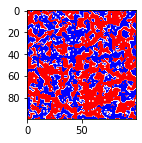

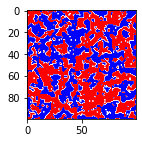

In [9]:
sample = attitude_shock_data\
    .query("seed == 100")\
    .query("scope == 'global'")\
    .query("directionality == 'constant'")\
    .query("`n shocked` == 500")

d = sample.query("step==400").get("attitude").values[0]
plt.figure(figsize=(2,2))
plt.imshow(d.reshape(100, 100) >= 0.5, cmap="bwr")
d = sample.query("step==800").get("attitude").values[0]
plt.figure(figsize=(2,2))
plt.imshow(d.reshape(100, 100) >= 0.5, cmap="bwr")

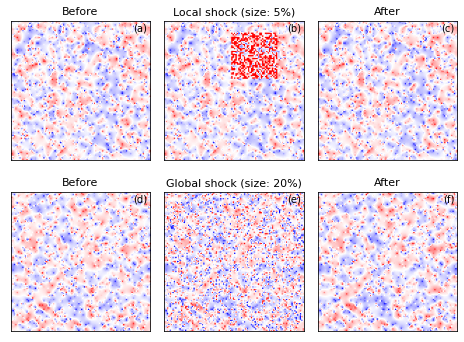

In [10]:
#######################
# Show shock snapshots
#######################
fig, ax = plt.subplots(2, 3, figsize=(8,6))

sample = attitude_shock_data\
    .query("seed == 114")\
    .query("scope == 'local'")\
    .query("directionality == 'constant'")\
    .query("`n shocked` == 500")

d = sample.query("step==390").get("attitude").values[0]
ax[0,0].imshow(d.reshape(100, 100), cmap="bwr")
ax[0,0].text(s="(a)", x=0.98, y=0.98, transform=ax[0,0].transAxes, ha="right", va="top")
ax[0,0].set_title("Before", fontsize=11, x=0.5)

d = sample.query("step==400").get("attitude").values[0]
ax[0,1].imshow(d.reshape(100, 100), cmap="bwr")
ax[0,1].text(s="(b)", x=0.98, y=0.98, transform=ax[0,1].transAxes, ha="right", va="top")
ax[0,1].set_title("Local shock (size: 5%)", fontsize=11, x=0.5)

d = sample.query("step==800").get("attitude").values[0]
ax[0,2].imshow(d.reshape(100, 100), cmap="bwr")
ax[0,2].text(s="(c)", x=0.98, y=0.98, transform=ax[0,2].transAxes, ha="right", va="top")
ax[0,2].set_title("After", fontsize=11, x=0.5)

sample = attitude_shock_data\
    .query("seed == 102")\
    .query("scope == 'global'")\
    .query("directionality == 'random'")\
    .query("`n shocked` == 2_000")

d = sample.query("step==390").get("attitude").values[0]
ax[1,0].imshow(d.reshape(100, 100), cmap="bwr")
ax[1,0].text(s="(d)", x=0.98, y=0.98, transform=ax[1,0].transAxes, ha="right", va="top")
ax[1,0].set_title("Before", fontsize=11, x=0.5)

d = sample.query("step==400").get("attitude").values[0]
ax[1,1].imshow(d.reshape(100, 100), cmap="bwr")
ax[1,1].text(s="(e)", x=0.98, y=0.98, transform=ax[1,1].transAxes, ha="right", va="top")
ax[1,1].set_title("Global shock (size: 20%)", fontsize=11, x=0.5)

d = sample.query("step==800").get("attitude").values[0]
ax[1,2].imshow(d.reshape(100, 100), cmap="bwr")
ax[1,2].text(s="(f)", x=0.98, y=0.98, transform=ax[1,2].transAxes, ha="right", va="top")
ax[1,2].set_title("After", fontsize=11, x=0.5)

for axis in ax.flatten():
    axis.set_xticks([])
    axis.set_yticks([])
    
plt.subplots_adjust(hspace=0.1, wspace=0.1)

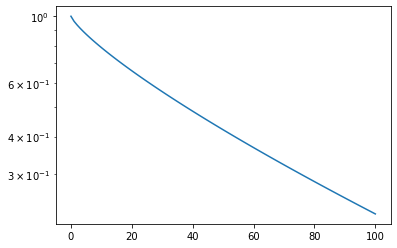

In [62]:
x = np.linspace(0, 100, 99)
plt.semilogy(x, np.exp(-(x/60)**0.8))

[0.6317735  1.         0.64191029 0.56301694 1.         1.
 1.         0.7280525  0.54947657]


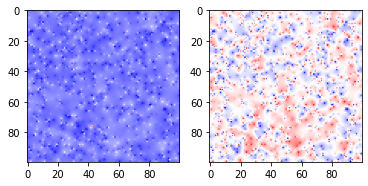

In [20]:
file = "affinity_seed100_p500_const_local.csv"
path = "../data/shocks/tmp"
attitudes = np.genfromtxt(os.path.join(path, file), delimiter=' ')

fig, ax = plt.subplots(1, 2, figsize=(6, 3))

attitudes[9][7642] = 2
print(attitudes[10][[7642, 7643, 7641, 7541, 7542, 7543, 7741, 7742, 7743]])
ax[0].imshow(attitudes[9].reshape(100, 100), cmap="bwr")
ax[1].imshow(attitudes[11].reshape(100, 100), cmap="bwr")

In [21]:
sample.query("step==390").get("attitude").values[0].mean() - sample.query("step==800").get("attitude").values[0].mean()

0.0010927291438357356

In [22]:
attitudes[10][[0, 1]]

array([0.53742899, 0.58102821])

In [23]:
np.unique(attitude_shock_data.get("n shocked"))

array([100, 500, 1000, 1500, 2000, 2500, 5000], dtype=object)

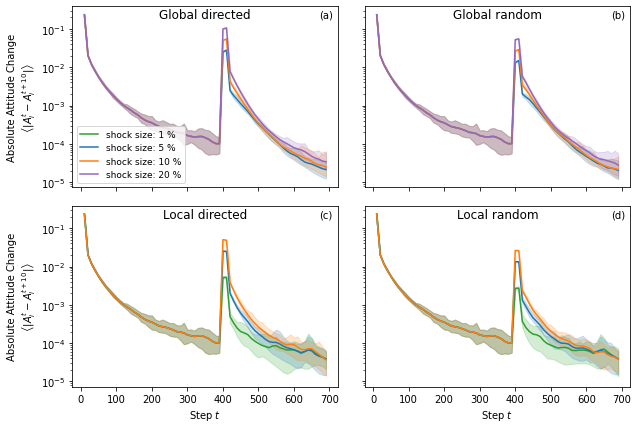

In [24]:
#########################################
# recovery process for uniform state 
# & different states
#########################################
fig, ax = plt.subplots(2,2, figsize=(10,7), sharex=True, sharey=True)
colors = {500: "tab:blue", 1000: "tab:orange", 100: "tab:green", 2_000: "tab:purple"}
i = 0
for scope in ("global", "local"):
    for direction in ("constant", "random"):
        axis = ax.flatten()[i]
        i += 1
        n_shocked_arr = (500, 1000, 2_000)
        if scope == "local":
            n_shocked_arr = (100, 500, 1000)
            
        for n_shocked in n_shocked_arr:
            _d = attitude_shock_data\
                .query("scope == @scope")\
                .query("directionality == @direction")\
                .query("`n shocked` == @n_shocked")

            steps = np.arange(0, 700, 10)
            
            diffs = []
            for k in range(20):
                aa = np.array([_d.query("step==@step").get("attitude").values[k] for step in steps])
                abs_diff = np.abs(np.diff(aa, axis=0)).sum(axis=1) / 10_000
                diffs.append(abs_diff)

            y_upper = np.percentile(np.array(diffs), 95, axis=0)
            y_lower = np.percentile(np.array(diffs), 5, axis=0)
            axis.fill_between(steps[1:], y_upper, y_lower, color=colors[n_shocked], alpha=0.2)
            
            axis.semilogy(steps[1:], np.array(diffs).mean(axis=0), "-", mfc=None, ms=3,
                          color=colors[n_shocked], label=f"shock size: {n_shocked / 10_000 * 100:.0f} %")

h1, l1 = ax[0,0].get_legend_handles_labels()
h2, l2 = ax[1,0].get_legend_handles_labels()

indices = [i for i in range(len(l1)) if l2[i] not in l1]
labels = [l2[i] for i in indices] + l1
handles = [h2[i] for i in indices] + h1

ax[0,0].legend(handles, labels, fontsize=9, loc="lower left")

for axis, number in zip(ax.flatten(), ("a", "b", "c", "d", "e", "f")):
    axis.text(x=0.98, y=0.98, ha='right', va='top', s=f"({number})", transform=axis.transAxes)
    
ax[0, 0].set_title("Global directed", y=0.9)
ax[0, 1].set_title("Global random", y=0.9)
ax[1, 0].set_title("Local directed", y=0.9)
ax[1, 1].set_title("Local random", y=0.9)

ax[0,0].set_ylabel("Absolute Attitude Change\n" + r"$\left\langle \| A_i^t - A_i^{t+10}\| \right\rangle$")
ax[1,0].set_ylabel("Absolute Attitude Change\n" + r"$\left\langle \| A_i^t - A_i^{t+10}\| \right\rangle$")
ax[1,0].set_xlabel(r"Step $t$")
ax[1,1].set_xlabel(r"Step $t$")

plt.subplots_adjust(hspace=0.1, wspace=0.1)

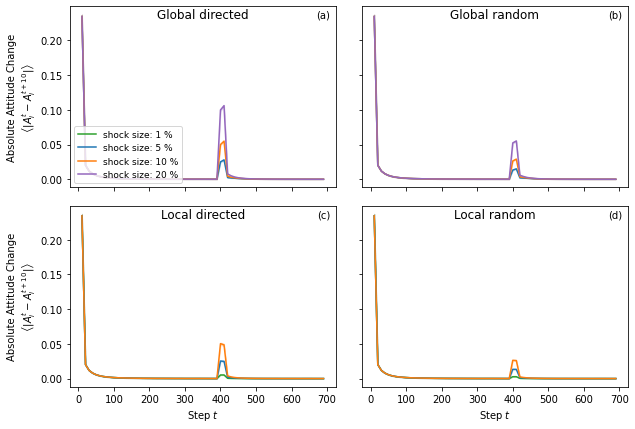

In [25]:
#########################################
# recovery process for uniform state 
# & different states
#########################################
fig, ax = plt.subplots(2,2, figsize=(10,7), sharex=True, sharey=True)
colors = {500: "tab:blue", 1000: "tab:orange", 100: "tab:green", 2_000: "tab:purple"}
i = 0
for scope in ("global", "local"):
    for direction in ("constant", "random"):
        axis = ax.flatten()[i]
        i += 1
        n_shocked_arr = (500, 1000, 2_000)
        if scope == "local":
            n_shocked_arr = (100, 500, 1000)
            
        for n_shocked in n_shocked_arr:
            _d = attitude_shock_data\
                .query("scope == @scope")\
                .query("directionality == @direction")\
                .query("`n shocked` == @n_shocked")

            steps = np.arange(0, 700, 10)
            
            diffs = []
            for k in range(20):
                aa = np.array([_d.query("step==@step").get("attitude").values[k] for step in steps])
                abs_diff = np.abs(np.diff(aa, axis=0)).sum(axis=1) / 10_000
                diffs.append(abs_diff)

            y_upper = np.percentile(np.array(diffs), 95, axis=0)
            y_lower = np.percentile(np.array(diffs), 5, axis=0)
            axis.fill_between(steps[1:], y_upper, y_lower, color=colors[n_shocked], alpha=0.2)
            
            axis.plot(steps[1:], np.array(diffs).mean(axis=0), "-", mfc=None, ms=3,
                          color=colors[n_shocked], label=f"shock size: {n_shocked / 10_000 * 100:.0f} %")

h1, l1 = ax[0,0].get_legend_handles_labels()
h2, l2 = ax[1,0].get_legend_handles_labels()

indices = [i for i in range(len(l1)) if l2[i] not in l1]
labels = [l2[i] for i in indices] + l1
handles = [h2[i] for i in indices] + h1

ax[0,0].legend(handles, labels, fontsize=9, loc="lower left")

for axis, number in zip(ax.flatten(), ("a", "b", "c", "d", "e", "f")):
    axis.text(x=0.98, y=0.98, ha='right', va='top', s=f"({number})", transform=axis.transAxes)
    
ax[0, 0].set_title("Global directed", y=0.9)
ax[0, 1].set_title("Global random", y=0.9)
ax[1, 0].set_title("Local directed", y=0.9)
ax[1, 1].set_title("Local random", y=0.9)

ax[0,0].set_ylabel("Absolute Attitude Change\n" + r"$\left\langle \| A_i^t - A_i^{t+10}\| \right\rangle$")
ax[1,0].set_ylabel("Absolute Attitude Change\n" + r"$\left\langle \| A_i^t - A_i^{t+10}\| \right\rangle$")
ax[1,0].set_xlabel(r"Step $t$")
ax[1,1].set_xlabel(r"Step $t$")

plt.subplots_adjust(hspace=0.1, wspace=0.1)

In [91]:
steps

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680, 690])

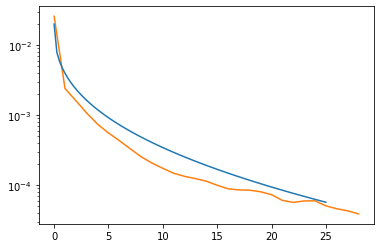

In [90]:
y_upper = np.percentile(np.array(diffs), 95, axis=0)
y_lower = np.percentile(np.array(diffs), 5, axis=0)
#plt.fill_between(steps[1:], y_upper, y_lower, color=colors[n_shocked], alpha=0.2)

y = np.array(diffs).mean(axis=0)[40:]

plt.semilogy(y, "-", mfc=None, ms=3,
              color=colors[n_shocked], label=f"shock size: {n_shocked / 10_000 * 100:.0f} %")

x = np.linspace(0, 25, 100)
plt.semilogy(x, 0.02*np.exp(-(x/0.3)**.4))

In [95]:
_d = attitude_shock_data\
    .query("scope == 'global'")\
    .query("directionality == 'constant'")\
    .query("`n shocked` == 500")

di = lambda r: theta(r-0.5)-theta(0.5-r)
di_vec = np.vectorize(di)
d1 = np.array([di_vec(x).sum() for x in _d.query("step==@step_eq1").get("attitude").values])

d2

array([0.50548307, 0.50017479, 0.49628253, 0.50189256, 0.49949088,
       0.49599615, 0.50806828, 0.50667646, 0.49770968, 0.51062627,
       0.50341599, 0.50339263, 0.50924918, 0.50579432, 0.4978867 ,
       0.49305195, 0.49941189, 0.49410884, 0.50392319, 0.50203644,
       0.50546246, 0.50017467, 0.49628219, 0.50189245, 0.49949059,
       0.49599544, 0.50806774, 0.5066738 , 0.49770926, 0.51062614,
       0.50341591])

In [94]:
def theta(x):
    if x >= 0.:
        return 1
    else:
        return 0

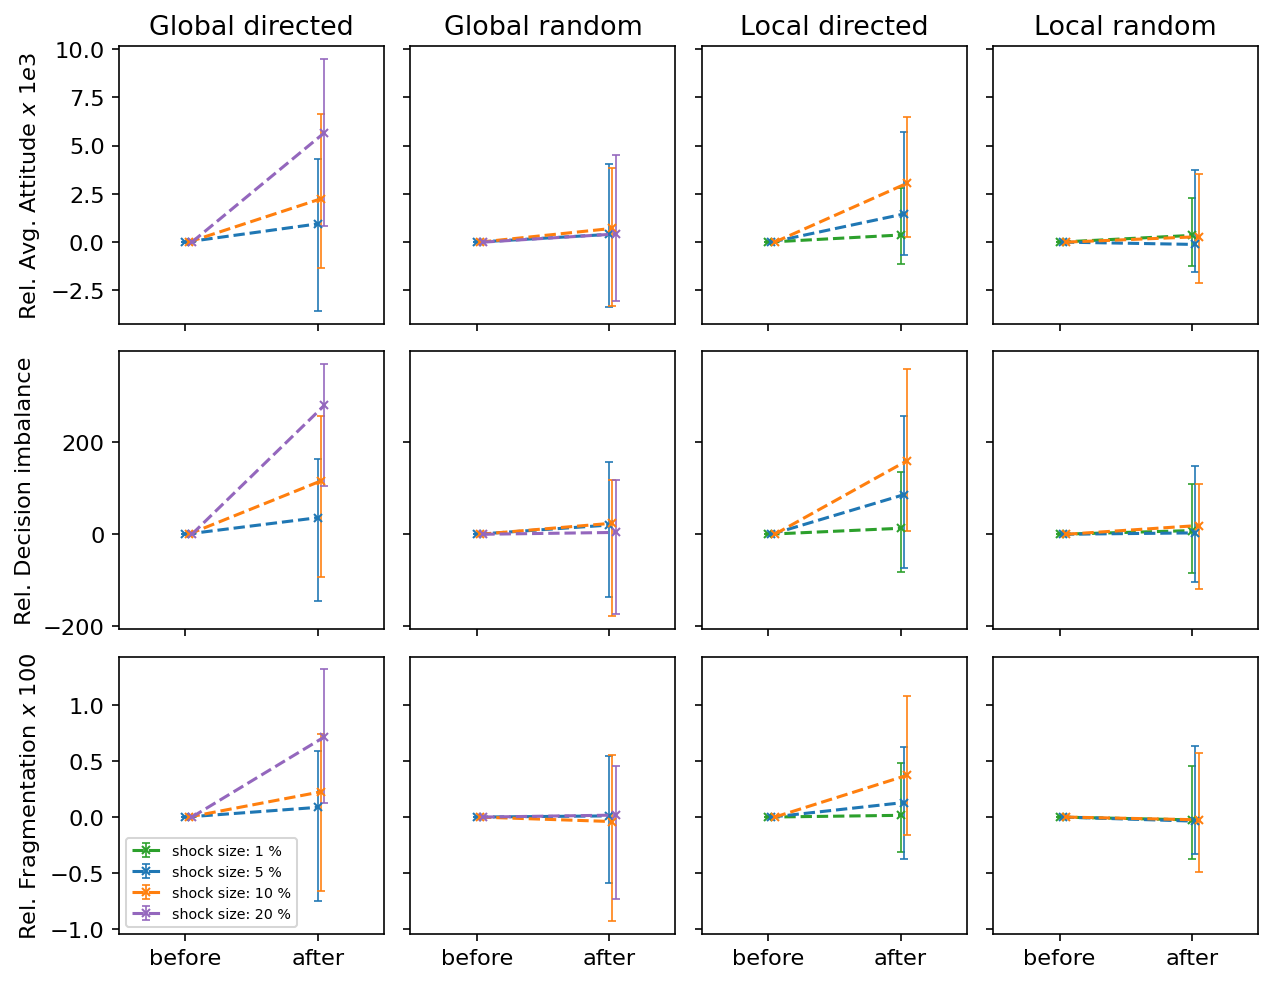

In [835]:
#########################################
# Comparison of equilibria
# (attitude, DI, fragmentation, polarization)
#########################################
from BlockNNClustering import *

def connectivity_stats(stats):
    out = []
    for cluster in stats.positive:
        counts = cluster.sizes
        counts = np.concatenate([counts, np.ones(cluster.noise_count)])
        s = counts.sum()
        if s <= 1: connectivity = 0
        else: connectivity = (s - counts.size) / (s - 1)
        out.append(connectivity)
    return out

def fragmentation(attitudes):
    N = 100
    decisions = np.int32(attitudes.reshape(N, N) >= 0.5)
    _, (_, labels) = block_clustering.fit(decisions)
    unique_labels_, counts_ = np.unique(labels, return_counts=True)
    sizes = counts_[unique_labels_ >= 0]
    noise_count = counts_[unique_labels_ == -1]
    counts = np.concatenate([sizes, np.ones(noise_count)])
    s = counts.sum()
    if s <= 1:
        return 0
    return (s - counts.size) / (s - 1)

block_clustering = BlockNNClustering(min_cluster_size=1)

plt.rcParams.update({"figure.dpi": 147, "font.size": 11})
fig, ax = plt.subplots(3, 4, sharex="col", sharey="row", figsize=(10, 8))

sample = attitude_shock_data\
    .query("scope == 'global'")\
    .query("directionality == 'constant'")\

step_eq1 = 390
step_eq2 = 800

categories = ["before", "after"]
x = np.arange(len(categories))

colors = {500: "tab:blue", 1000: "tab:orange", 100: "tab:green", 2000: "tab:purple"}
err_style = {"marker": "x", "ms": 4, "linestyle":"--", "capsize": 2.,"capthick":0.8, "elinewidth": 0.8}

ax_count = 0
for scope in ("global", "local"):
    for direction in ("constant", "random"):
        n_shocked_arr = (500, 1000, 2000)
        if scope == "local":
            n_shocked_arr = (100, 500, 1000)
        
        gap = 0.
        for n_shocked in n_shocked_arr:
            _d = attitude_shock_data\
                .query("scope == @scope")\
                .query("directionality == @direction")\
                .query("`n shocked` == @n_shocked")

            ax_col = ax.transpose()[ax_count]
            
            # mean attitude
            # ------------------
            d1 = np.array([np.mean(x) for x in _d.query("step==@step_eq1").get("attitude").values])
            d2 = np.array([np.mean(x) for x in _d.query("step==@step_eq2").get("attitude").values])
            
            before = (d1 / d1 - 1.0) * 1_000
            after = (d2 / d1 - 1.0) * 1_000
            y = [np.median(before), np.median(after)]
            value_range = [[np.median(x) - x.min() for x in (before, after)], 
                           [x.max() - np.median(x) for x in (before, after)]]

            #for dd1, dd2 in zip(d1, d2):
            #    ax_col[0].plot(x, [dd1 / dd1, dd2/dd1], color=colors[n_shocked])
            #stderr = [(d1 / d1).std() / np.sqrt(d1.size), (d2 / d1).std() / np.sqrt(d2.size)]
        
            ax_col[0].errorbar(x=x+gap, y=y, yerr=value_range, label=f"shock size: {n_shocked / 10_000 * 100:.0f} %", 
                               color=colors[n_shocked], **err_style)

            # DI
            # ------------------
            di = lambda r: theta(r-0.5)-theta(0.5-r)
            di_vec = np.vectorize(di)
            d1 = np.array([di_vec(x).sum() for x in _d.query("step==@step_eq1").get("attitude").values])
            d2 = np.array([di_vec(x).sum() for x in _d.query("step==@step_eq2").get("attitude").values])
            
            before = d1 - d1
            after = d2 - d1
            y = [np.median(before), np.median(after)]
            value_range = [[np.median(x) - x.min() for x in (before, after)], 
                           [x.max() - np.median(x) for x in (before, after)]]

            #for dd1, dd2 in zip(d1, d2):
            #    ax_col[0].plot(x, [dd1 / dd1, dd2/dd1], color=colors[n_shocked])
            #stderr = [(d1 / d1).std() / np.sqrt(d1.size), (d2 / d1).std() / np.sqrt(d2.size)]
        
            ax_col[1].errorbar(x=x+gap, y=y, yerr=value_range, label=f"shock size: {n_shocked / 10_000 * 100:.0f} %", 
                               color=colors[n_shocked], **err_style)

            # fragmentation
            # ------------------
            d1 = np.array([fragmentation(x) for x in _d.query("step==@step_eq1").get("attitude").values])
            d2 = np.array([fragmentation(x) for x in _d.query("step==@step_eq2").get("attitude").values])
            
            before = (d1 / d1 - 1) * 100
            after = (d2 / d1 -1 ) * 100
            y = [np.median(before), np.median(after)]
            value_range = [[np.median(x) - x.min() for x in (before, after)], 
                           [x.max() - np.median(x) for x in (before, after)]]

            #for dd1, dd2 in zip(d1, d2):
            #    ax_col[0].plot(x, [dd1 / dd1, dd2/dd1], color=colors[n_shocked])
            #stderr = [(d1 / d1).std() / np.sqrt(d1.size), (d2 / d1).std() / np.sqrt(d2.size)]
        
            ax_col[2].errorbar(x=x+gap, y=y, yerr=value_range, label=f"shock size: {n_shocked / 10_000 * 100:.0f} %", 
                               color=colors[n_shocked], **err_style)

            #ax_col[1].errorbar(x=x, y=[], yerr=[])
            gap += 0.025
            
        ax_count += 1

for axis in ax.flatten():    
    axis.set_xticks(x, categories)

    # adjust the spacing between the categories
    axis.set_xlim(x.min()-0.5, x.max()+0.5)

h1, l1 = ax[0,0].get_legend_handles_labels()
h2, l2 = ax[0,2].get_legend_handles_labels()

indices = [i for i in range(len(l1)) if l2[i] not in l1]
labels = [l2[i] for i in indices] + l1
handles = [h2[i] for i in indices] + h1

ax[2,0].legend(handles, labels, fontsize=7, loc="lower left")

ax[0, 0].set_title("Global directed")
ax[0, 1].set_title("Global random")
ax[0, 2].set_title("Local directed")
ax[0, 3].set_title("Local random")

ax[0, 0].set_ylabel(r"Rel. Avg. Attitude $x\ 1e3$")
ax[1, 0].set_ylabel(r"Rel. Decision imbalance")
ax[2, 0].set_ylabel(r"Rel. Fragmentation $x\ 100$")

plt.subplots_adjust(hspace=0.1, wspace=0.1)

In [226]:
#################
# helpers
def index_to_crds(index, Nx):
    coords = np.zeros(2, dtype='int32')
    coords[1] = int(index % Nx)
    coords[0] = int(index / Nx)
    return coords

def crds_to_index(coords, Nx):
    return int(coords[0] * Nx + coords[1])

def get_neighbour_crds(i, j, Nx, Ny, r=1):
    """
    Returns the list of neighboring indices for a cell at position (i, j)
    in a 2D grid with periodic boundary conditions and dimensions Nx x Ny.
    """
    di_values = list(range(-r, r+1))
    dj_values = list(range(-r, r+1))
    neighbours = [((i+di) % Nx, (j+dj) % Ny)
                 for di in di_values
                 for dj in dj_values
                 if di != 0 or dj != 0]
    return neighbours

def map_index_to_neighbours(idx, N, r=1):
    return [crds_to_index(crd, N) for crd in get_neighbour_crds(*index_to_crds(idx, N), N, N, r=r)]
    

index_mapping = np.array([map_index_to_neighbours(k, 100) for k in range(10_000)])

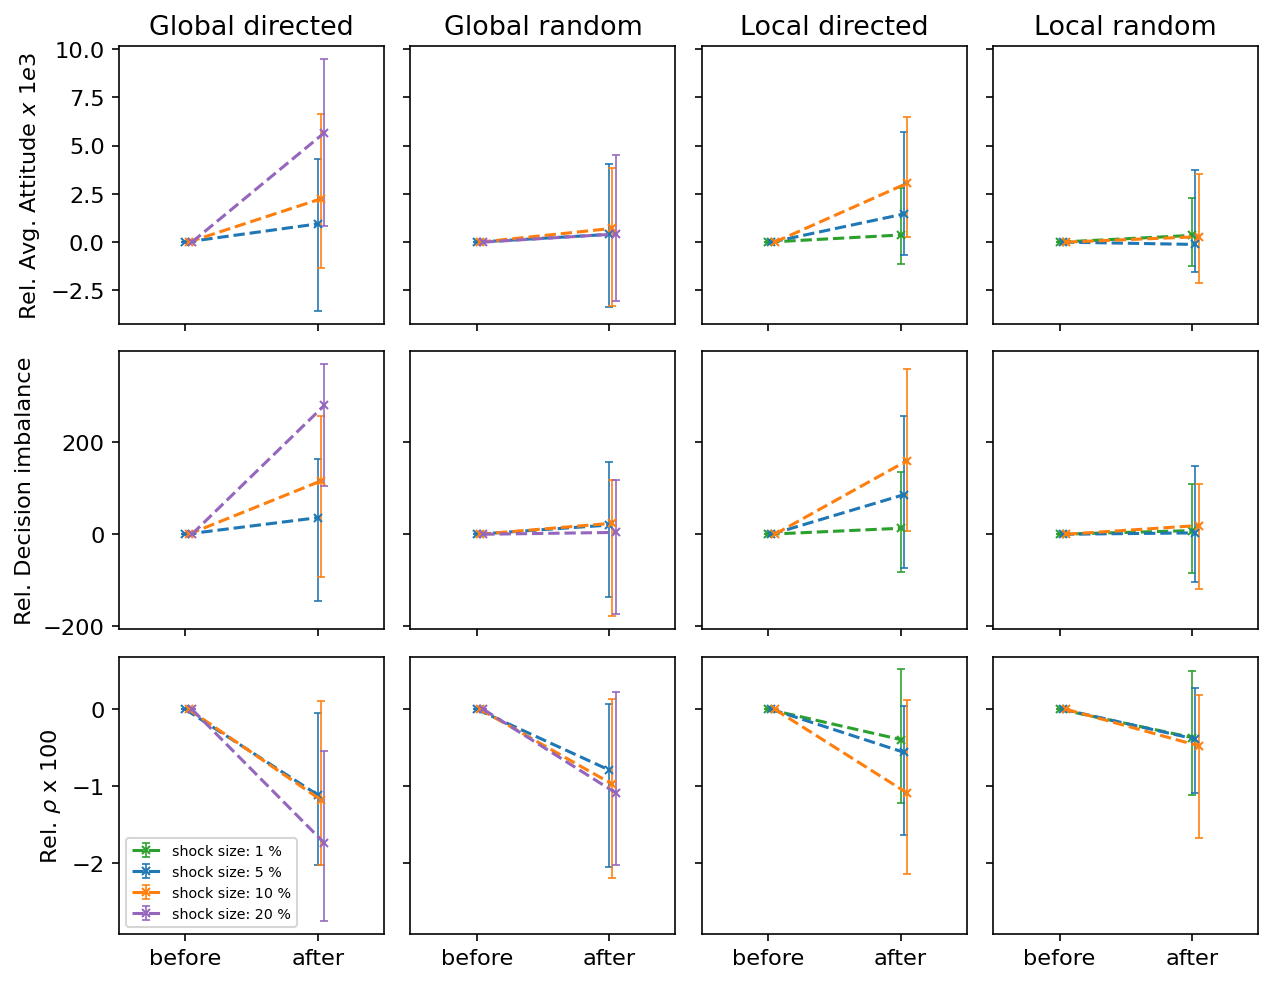

In [233]:
#########################################
# Comparison of equilibria
# (attitude, DI, fragmentation, polarization)
#########################################
from BlockNNClustering import *

def connectivity_stats(stats):
    out = []
    for cluster in stats.positive:
        counts = cluster.sizes
        counts = np.concatenate([counts, np.ones(cluster.noise_count)])
        s = counts.sum()
        if s <= 1: connectivity = 0
        else: connectivity = (s - counts.size) / (s - 1)
        out.append(connectivity)
    return out

def fragmentation(attitudes):
    N = 100
    decisions = np.int32(attitudes.reshape(N, N) >= 0.5)
    _, (_, labels) = block_clustering.fit(decisions)
    unique_labels_, counts_ = np.unique(labels, return_counts=True)
    sizes = counts_[unique_labels_ >= 0]
    noise_count = counts_[unique_labels_ == -1]
    counts = np.concatenate([sizes, np.ones(noise_count)])
    s = counts.sum()
    if s <= 1:
        return 0
    return (s - counts.size) / (s - 1)

def density_of_interfaces(array):
    return np.logical_xor(array[index_mapping] >= 0.5, np.tile(array >= 0.5, (8,1)).transpose()).sum() / (8 * array.size)

block_clustering = BlockNNClustering(min_cluster_size=1)

plt.rcParams.update({"figure.dpi": 147, "font.size": 11})
fig, ax = plt.subplots(3, 4, sharex="col", sharey="row", figsize=(10, 8))

sample = attitude_shock_data\
    .query("scope == 'global'")\
    .query("directionality == 'constant'")\

step_eq1 = 390
step_eq2 = 800

categories = ["before", "after"]
x = np.arange(len(categories))

colors = {500: "tab:blue", 1000: "tab:orange", 100: "tab:green", 2000: "tab:purple"}
err_style = {"marker": "x", "ms": 4, "linestyle":"--", "capsize": 2.,"capthick":0.8, "elinewidth": 0.8}

ax_count = 0
for scope in ("global", "local"):
    for direction in ("constant", "random"):
        n_shocked_arr = (500, 1000, 2000)
        if scope == "local":
            n_shocked_arr = (100, 500, 1000)
        
        gap = 0.
        for n_shocked in n_shocked_arr:
            _d = attitude_shock_data\
                .query("scope == @scope")\
                .query("directionality == @direction")\
                .query("`n shocked` == @n_shocked")

            ax_col = ax.transpose()[ax_count]
            
            # mean attitude
            # ------------------
            d1 = np.array([np.mean(x) for x in _d.query("step==@step_eq1").get("attitude").values])
            d2 = np.array([np.mean(x) for x in _d.query("step==@step_eq2").get("attitude").values])
            
            before = (d1 / d1 - 1.0) * 1_000
            after = (d2 / d1 - 1.0) * 1_000
            y = [np.median(before), np.median(after)]
            value_range = [[np.median(x) - x.min() for x in (before, after)], 
                           [x.max() - np.median(x) for x in (before, after)]]

            #for dd1, dd2 in zip(d1, d2):
            #    ax_col[0].plot(x, [dd1 / dd1, dd2/dd1], color=colors[n_shocked])
            stderr = [(d1 / d1).std() / np.sqrt(d1.size), (d2 / d1).std() / np.sqrt(d2.size)]
        
            ax_col[0].errorbar(x=x+gap, y=y, yerr=value_range, label=f"shock size: {n_shocked / 10_000 * 100:.0f} %", 
                               color=colors[n_shocked], **err_style)

            # DI
            # ------------------
            di = lambda r: theta(r-0.5)-theta(0.5-r)
            di_vec = np.vectorize(di)
            d1 = np.array([di_vec(x).sum() for x in _d.query("step==@step_eq1").get("attitude").values])
            d2 = np.array([di_vec(x).sum() for x in _d.query("step==@step_eq2").get("attitude").values])
            
            before = d1 - d1
            after = d2 - d1
            y = [np.median(before), np.median(after)]
            value_range = [[np.median(x) - x.min() for x in (before, after)], 
                           [x.max() - np.median(x) for x in (before, after)]]

            #for dd1, dd2 in zip(d1, d2):
            #    ax_col[0].plot(x, [dd1 / dd1, dd2/dd1], color=colors[n_shocked])
            stderr = [(d1 / d1).std() / np.sqrt(d1.size), (d2 / d1).std() / np.sqrt(d2.size)]
        
            ax_col[1].errorbar(x=x+gap, y=y, yerr=value_range, label=f"shock size: {n_shocked / 10_000 * 100:.0f} %", 
                               color=colors[n_shocked], **err_style)
                
            #ax_col[1].plot(x+gap, np.array([before, after]))

            # fragmentation
            # ------------------
            d1 = np.array([density_of_interfaces(x) for x in _d.query("step==@step_eq1").get("attitude").values])
            d2 = np.array([density_of_interfaces(x) for x in _d.query("step==@step_eq2").get("attitude").values])
            
            before = (d1 / d1 - 1) * 100
            after = (d2 / d1 -1 ) * 100
            y = [np.median(before), np.median(after)]
            value_range = [[np.median(x) - x.min() for x in (before, after)], 
                           [x.max() - np.median(x) for x in (before, after)]]

            #for dd1, dd2 in zip(d1, d2):
            #    ax_col[0].plot(x, [dd1 / dd1, dd2/dd1], color=colors[n_shocked])
            #stderr = [(d1 / d1).std() / np.sqrt(d1.size), (d2 / d1).std() / np.sqrt(d2.size)]
        
            ax_col[2].errorbar(x=x+gap, y=y, yerr=value_range, label=f"shock size: {n_shocked / 10_000 * 100:.0f} %", 
                               color=colors[n_shocked], **err_style)

            #ax_col[1].errorbar(x=x, y=[], yerr=[])
            gap += 0.025
            
        ax_count += 1

for axis in ax.flatten():    
    axis.set_xticks(x, categories)

    # adjust the spacing between the categories
    axis.set_xlim(x.min()-0.5, x.max()+0.5)

h1, l1 = ax[0,0].get_legend_handles_labels()
h2, l2 = ax[0,2].get_legend_handles_labels()

indices = [i for i in range(len(l1)) if l2[i] not in l1]
labels = [l2[i] for i in indices] + l1
handles = [h2[i] for i in indices] + h1

ax[2,0].legend(handles, labels, fontsize=7, loc="lower left")

ax[0, 0].set_title("Global directed")
ax[0, 1].set_title("Global random")
ax[0, 2].set_title("Local directed")
ax[0, 3].set_title("Local random")

ax[0, 0].set_ylabel(r"Rel. Avg. Attitude $x\ 1e3$")
ax[1, 0].set_ylabel(r"Rel. Decision imbalance")
ax[2, 0].set_ylabel(r"Rel. $\rho$ x$\ 100$")

plt.subplots_adjust(hspace=0.1, wspace=0.1)

In [554]:
_d.query("step==@step_eq1").get("attitudes")

In [65]:
np.array([np.mean(x) for x in sample.query("step==@step_eq2").get("attitude").values])

array([0.51266908, 0.50720935, 0.50377136, 0.50908146, 0.50674273,
       0.50355027, 0.51639486, 0.51389466, 0.50457172, 0.51831892,
       0.51032144])

In [507]:
file_uniform = "../data/distributions/agent_data_1000steps.csv"
columns = ["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"]
data_uniform = LoadSimulation(file_uniform, columns=columns).query("step == 0")

In [551]:
_d.query("step==400")

,step,seed,n shocked,attitude,scope,directionality
850,400,100,2500,"[0.5561796837721575, 0.577729356626744, 0.5511...",global,constant
2308,400,101,2500,"[0.5485982594462115, 0.5256239112770327, 0.880...",global,constant
3766,400,102,2500,"[0.4901526873731157, 0.46365901151418015, 0.46...",global,constant
5224,400,103,2500,"[0.9490720732754048, 0.5315843469183948, 0.270...",global,constant
6682,400,104,2500,"[0.44905103760114784, 0.44446687485311365, 0.4...",global,constant
8140,400,105,2500,"[0.4451324862795733, 0.4496957625502602, 0.439...",global,constant
9598,400,106,2500,"[0.5603609613205915, 0.6235795241680997, 0.630...",global,constant
11056,400,107,2500,"[0.548049876971139, 0.526974134823356, 0.51873...",global,constant
12514,400,108,2500,"[0.5542556176699165, 0.557635053275157, 0.5524...",global,constant
13972,400,109,2500,"[0.45229666530119034, 0.5120254694662056, 0.52...",global,constant


100 local constant
131 agents identified as shocked.
243 agents identified as shocked.
205 agents identified as shocked.
164 agents identified as shocked.
125 agents identified as shocked.
170 agents identified as shocked.
500 local constant
527 agents identified as shocked.
643 agents identified as shocked.
605 agents identified as shocked.
564 agents identified as shocked.
525 agents identified as shocked.
565 agents identified as shocked.
1000 local constant
1028 agents identified as shocked.
1143 agents identified as shocked.
1106 agents identified as shocked.
1060 agents identified as shocked.
1025 agents identified as shocked.
1063 agents identified as shocked.
100 local random
75 agents identified as shocked.
189 agents identified as shocked.
160 agents identified as shocked.
105 agents identified as shocked.
68 agents identified as shocked.
124 agents identified as shocked.
500 local random
278 agents identified as shocked.
397 agents identified as shocked.
358 agents identifie

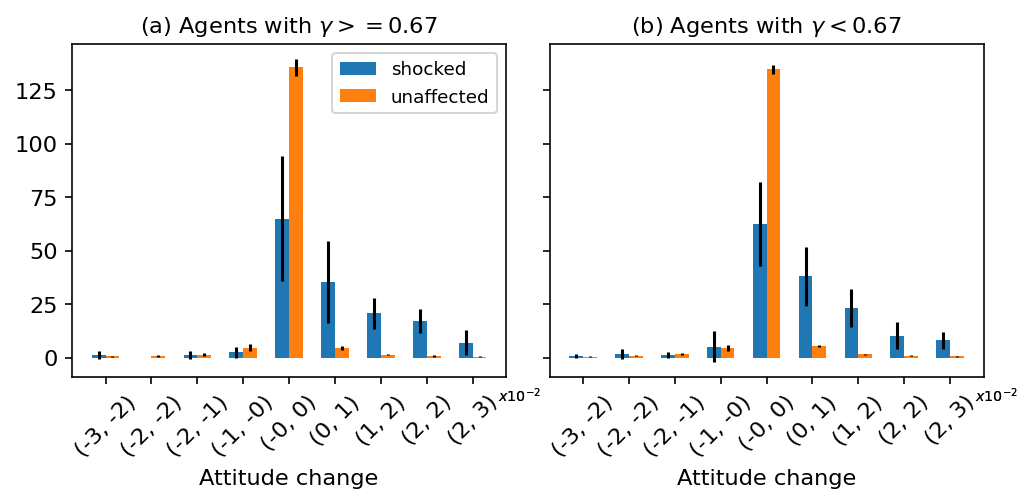

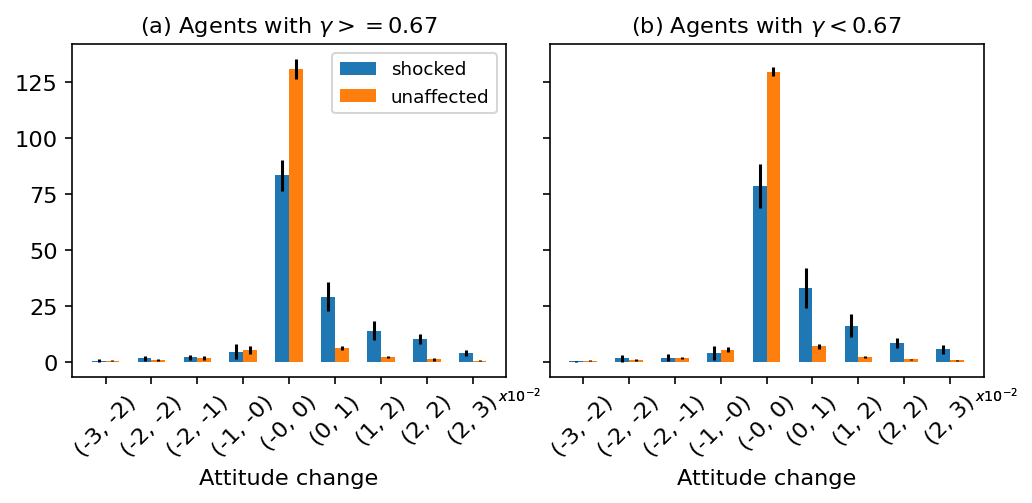

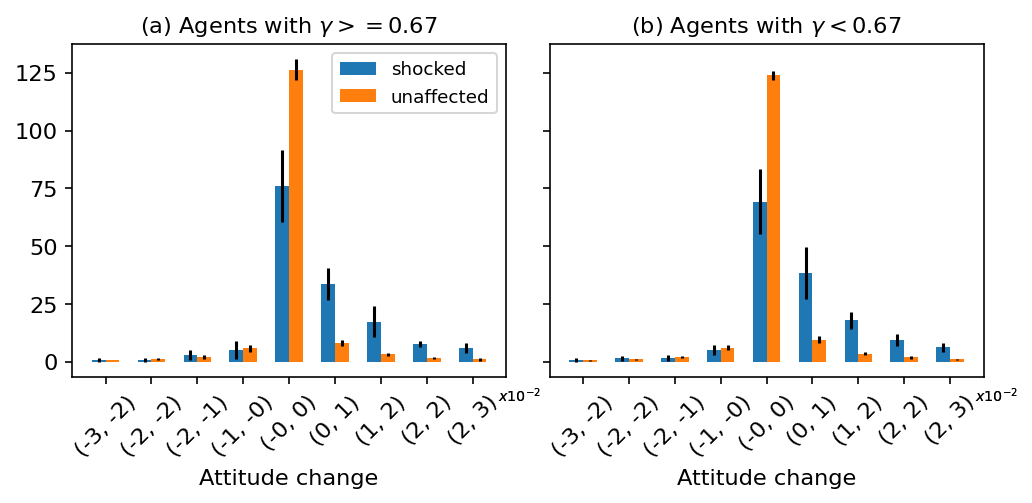

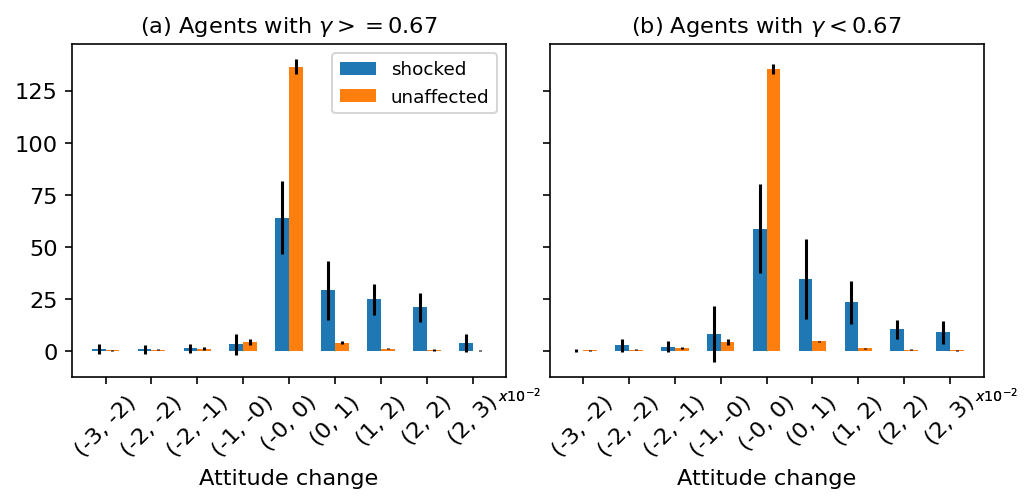

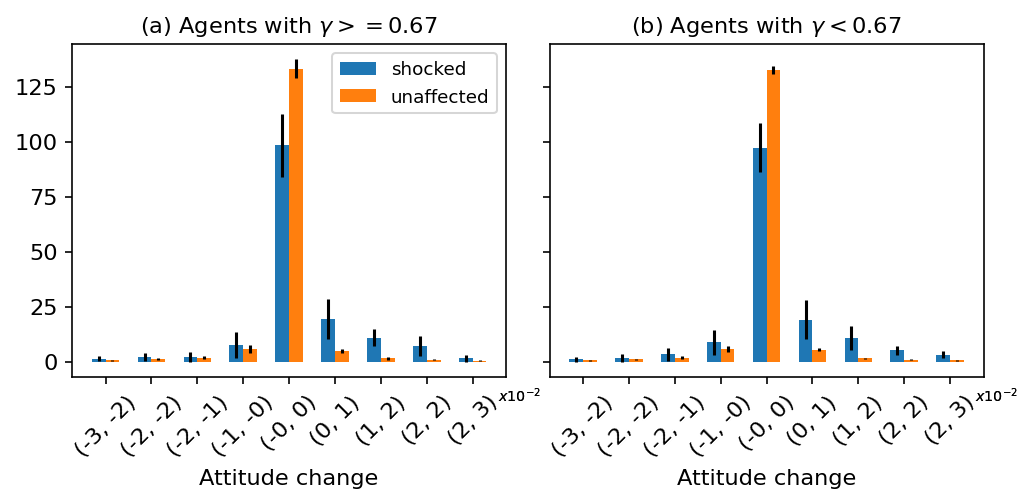

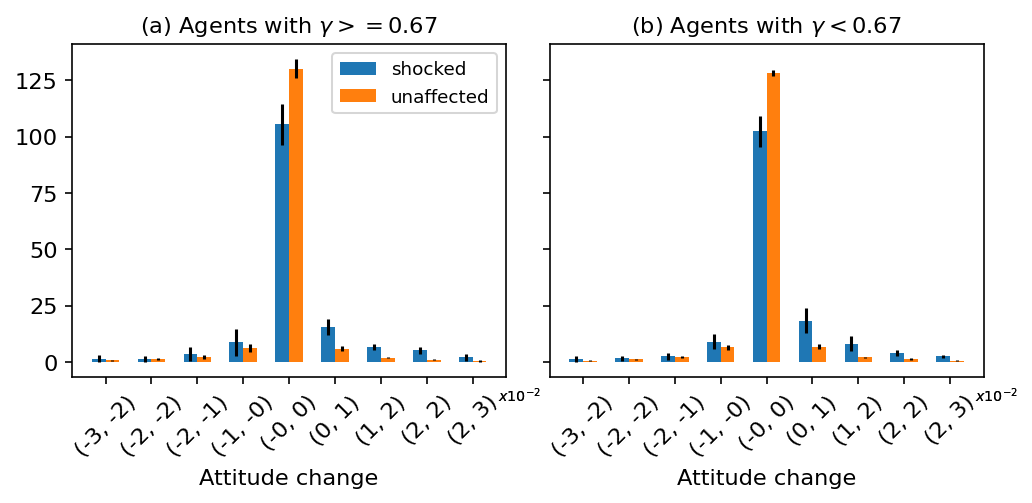

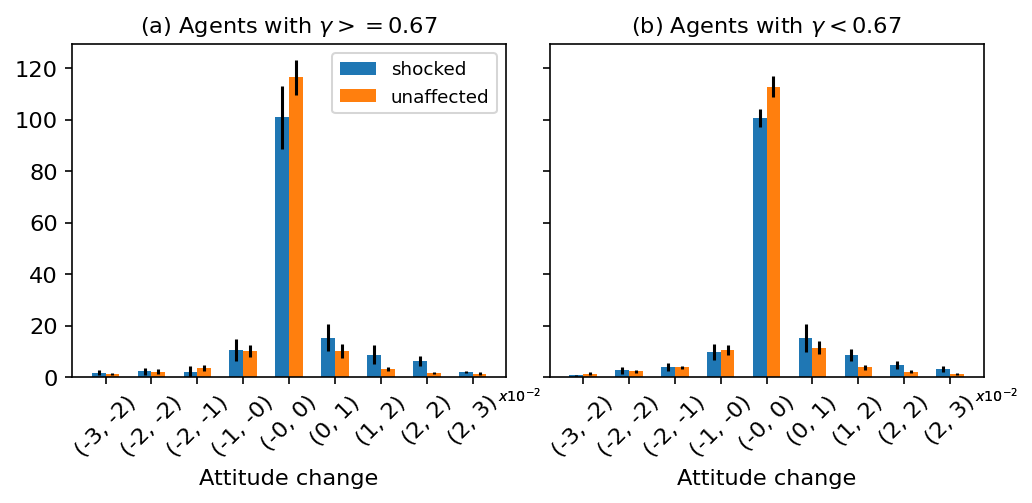

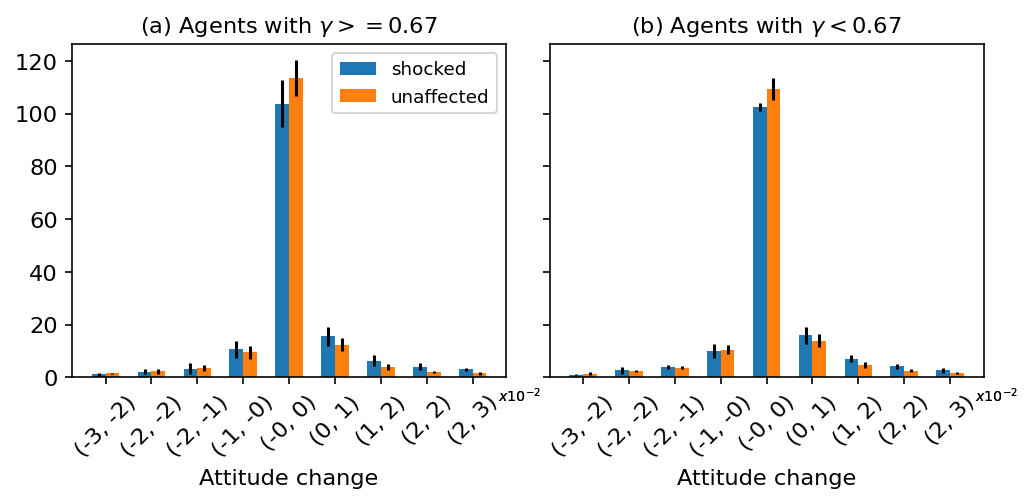

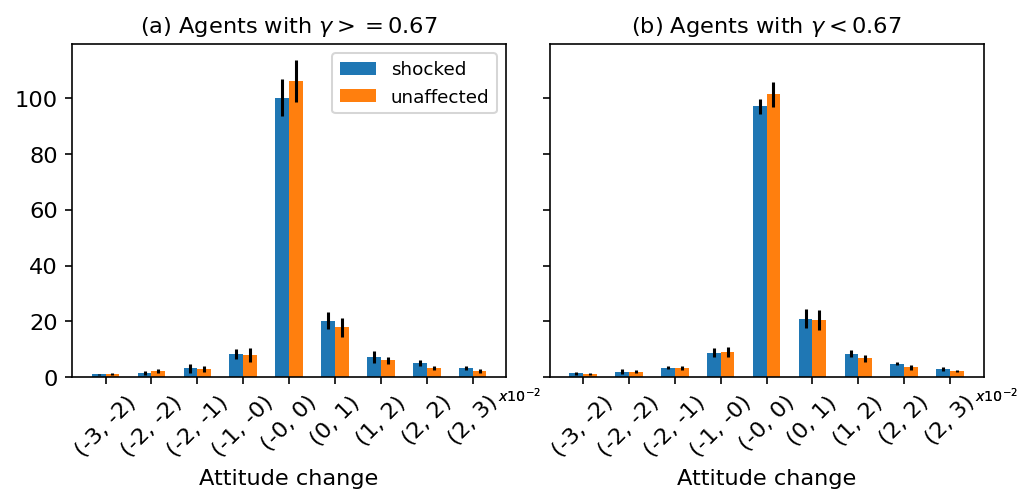

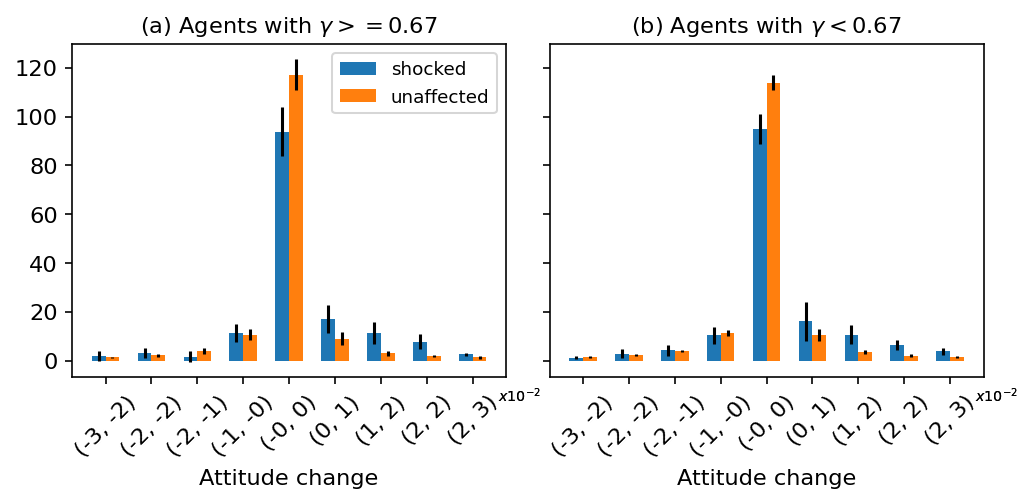

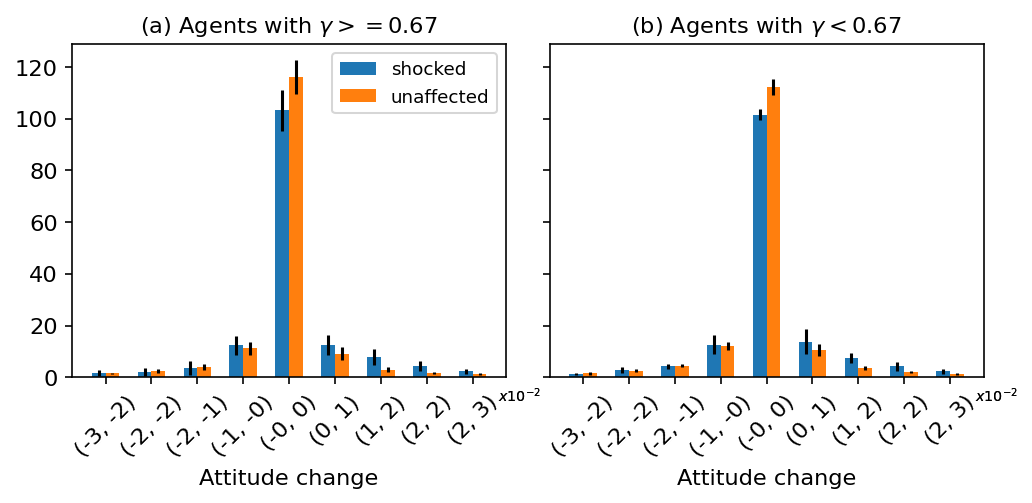

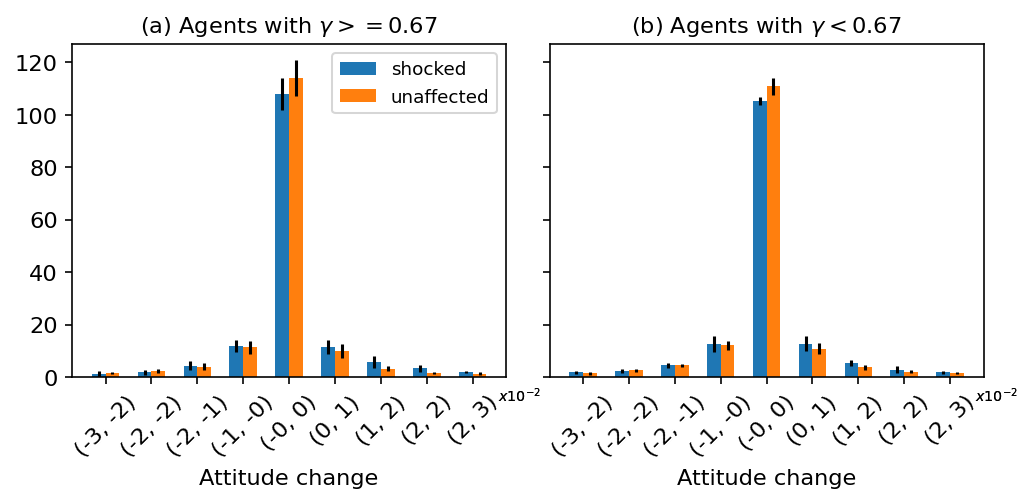

In [800]:
#########################################
# Influence of self-reliance on recovery
#########################################
gamma = data_uniform.query("seed==100").get("avantgarde").values

def get_hists(scope, direction, n_shocked):
    _d = attitude_shock_data\
        .query("scope == @scope")\
        .query("directionality == @direction")\
        .query("`n shocked` == @n_shocked")

    aa = _d.query("seed==100").query("step==400").get("attitude").values[0]
    bin_edges = np.linspace(-3e-2, 3e-2, 10)
    # collect histograms
    hists = {
        "total": [], 
        "high gamma shocked": [],
        "high gamma passed": [],
        "low gamma shocked": [],
        "low gamma passed": []
    }
    for seed in np.arange(100, 106, 1):

        aa_before = _d.query("seed==@seed").query("step==390").get("attitude").values[0]
        aa_shock = _d.query("seed==@seed").query("step==400").get("attitude").values[0]
        aa_after = _d.query("seed==@seed").query("step==800").get("attitude").values[0]

        # identify shocked agents
        shocked_mask = (aa_shock - aa_before) > 1e-3
        print("%d agents identified as shocked." % np.sum(shocked_mask))

        gamma_mask = gamma >= 0.6667

        hist, _ = np.histogram(aa_after - aa_before, bins=bin_edges)
        hists["total"].append(hist)

        mask = (gamma_mask & shocked_mask)
        hist, _ = np.histogram(aa_after[mask] - aa_before[mask], bins=bin_edges, density=True)
        hists["high gamma shocked"].append(hist)

        mask = (gamma_mask & ~shocked_mask)
        hist, _ = np.histogram(aa_after[mask] - aa_before[mask], bins=bin_edges, density=True)
        hists["high gamma passed"].append(hist)

        mask = (~gamma_mask & shocked_mask)
        hist, _ = np.histogram(aa_after[mask] - aa_before[mask], bins=bin_edges, density=True)
        hists["low gamma shocked"].append(hist)

        mask = (~gamma_mask & ~shocked_mask)
        hist, _ = np.histogram(aa_after[mask] - aa_before[mask], bins=bin_edges, density=True)
        hists["low gamma passed"].append(hist)
        
    return hists

    
# show histograms
def plot_hists(hists, axis, offset=0, label=""):
    offset *= 0.5 * (bin_edges[1] - bin_edges[0])
    
    # Compute the average histogram
    avg_hist = np.mean(hists, axis=0)

    # Plot the average histogram
    axis.bar(bin_edges[:-1] + offset, avg_hist, width=np.diff(bin_edges)*0.3 , align='center', label=label)

    # Compute the standard deviation of the histograms
    std_hist = np.std(hists, axis=0)

    # Plot the error bars
    axis.errorbar(bin_edges[:-1] + offset, avg_hist, yerr=std_hist, fmt='none', ecolor='black')

    # Format the bin edges as (lower, upper)
    bin_labels = [f'({lower*1e2:.0f}, {upper*1e2:.0f})' for lower, upper in zip(bin_edges[:-1], bin_edges[1:])]

    # Set the x-axis tick labels to the bin edges
    axis.set_xticks(bin_edges[:-1], bin_labels, rotation=45)
    axis.text(x=1.08, y=-0.08, fontsize=7, ha='right', va='bottom', s=r"$x10^{-2}$", transform=axis.transAxes)
    axis.set_xlabel(r"Attitude change")

for scope in ("local", "global"):
    for direction in ("constant", "random"):
        n_shocked_arr = (500, 1_000, 2_000)
        if scope == "local":
            n_shocked_arr = (100, 500, 1_000)
        gap = 0.
        for n_shocked in n_shocked_arr:
            print(n_shocked, scope, direction)
            hists = get_hists(scope, direction, n_shocked)
            fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

            plot_hists(hists["high gamma shocked"], ax1, -0.3, "shocked")
            plot_hists(hists["high gamma passed"], ax1, 0.3, "unaffected")
            plot_hists(hists["low gamma shocked"], ax2, -0.3, "shocked")
            plot_hists(hists["low gamma passed"], ax2, 0.3, "unaffected")

            ax1.set_title(r"(a) Agents with $\gamma >= 0.67$", fontsize=11)
            ax2.set_title(r"(b) Agents with $\gamma < 0.67$", fontsize=11)
            ax1.legend(fontsize=9, loc="best")
            fig.subplots_adjust(wspace=0.1)

            plt.savefig(f"../images/thesis/changes/{scope}-{direction}-{n_shocked}.png")
plt.show()

In [531]:
cuts = [0., 0.67, 1.0]
for binj in zip(cuts, cuts[1:]):
    gamma_mask = (gamma_shocked > binj[0]) & (gamma_shocked <= binj[1])
    before = aa_shocked_before[gamma_mask]
    after = aa_shocked_after[gamma_mask]
    
    y = [np.mean(before), np.mean(after)]
    #value_range = [np.std(before), np.std(after)]
    
    plt.errorbar(x, y, label=f"{binj[0]}-{binj[1]}")
    
    gamma_mask = (gamma_passed > binj[0]) & (gamma_passed <= binj[1])
    y1 = np.median(aa_passed_after[gamma_mask])
    y2 = np.median(aa_passed_before[gamma_mask])
    
    plt.plot(["before", "after"], [y2, y1], label=f"- {binj[0]}-{binj[1]}")

plt.legend()

array([False,  True,  True, ..., False,  True, False])

In [522]:
gamma_shocked, binj

(array([0.26012509, 0.70563962, 0.8372784 , ..., 0.35474815, 0.82364237,
        0.51901441]),
 (0.67, 1.0))

AttributeError: 'AxesSubplot' object has no attribute 'label'

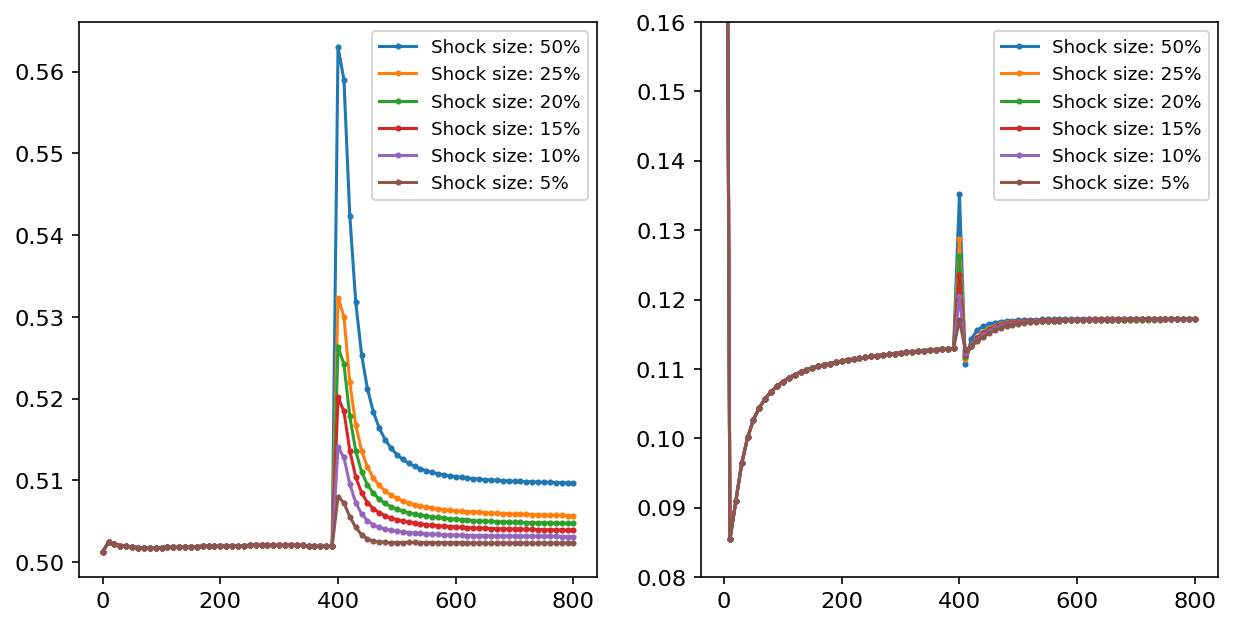

In [145]:
plt.rcParams.update({"figure.dpi": 147, "font.size": 11})

# plot CSRL data
d100 = dataCSRL.query("seed==100")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

for n_shocked in np.flip(np.unique(dataCSRL["n_shocked"])):
    dshock = dataCSRL.query("n_shocked == @n_shocked").groupby("step")
    
    N = 10000
    shock_size = n_shocked * 100 / N
    # plot errorbar
    ax1.errorbar(dshock["step"].mean(), dshock["A mean"].mean(), #yerr=dshock["A mean"].std()[::2], 
                 linestyle="-", fmt="o", ms=2, elinewidth=1., capsize=3., label=f"Shock size: {shock_size:.0f}%")

    ax2.errorbar(dshock["step"].mean(), dshock["A std"].mean(), #yerr=dshock["A mean"].std()[::2], 
                 linestyle="-", fmt="o", ms=2, elinewidth=1., capsize=3., label=f"Shock size: {shock_size:.0f}%")
    
ax1.legend(fontsize=9)
ax2.legend(fontsize=9)

ax2.set_ylim([0.08, .16])


ax1.label("asdf")

In [6]:
file_uniform = "../data/control/agent_data_uni.csv"
data = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal"])

In [158]:
def count_points_in_radius(r):
    # calculate the number of points within the given radius of the origin
    count = (2*r+1)**2
    return count

for i in range(20):
    print(i, count_points_in_radius(i))

0 1
1 9
2 25
3 49
4 81
5 121
6 169
7 225
8 289
9 361
10 441
11 529
12 625
13 729
14 841
15 961
16 1089
17 1225
18 1369
19 1521


In [308]:
[1.0 - 1.0, 1.0005 - 1.0]

[0.0, 0.0004999999999999449]

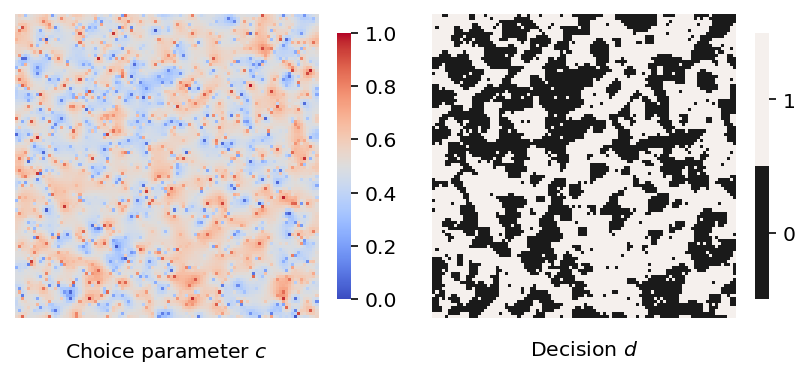

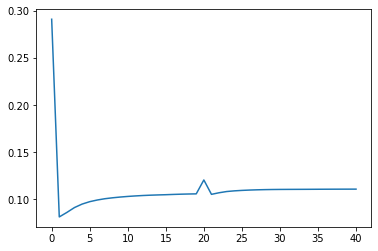

In [41]:
plt.plot(attitudes.std(axis=1))

146


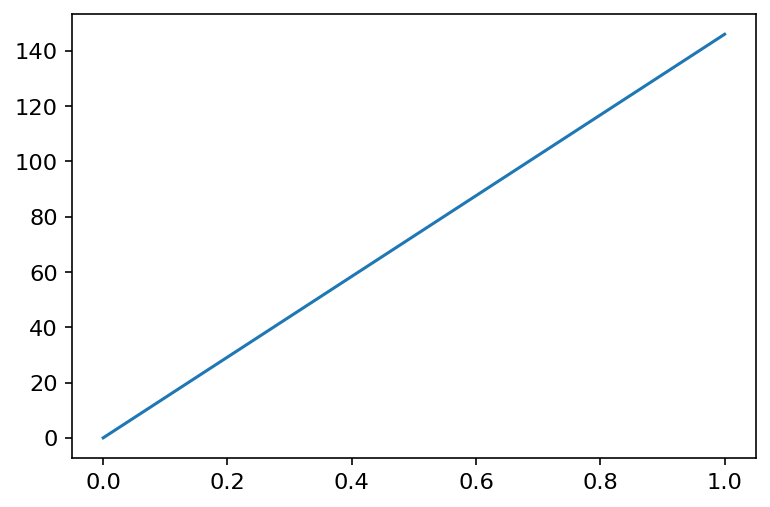

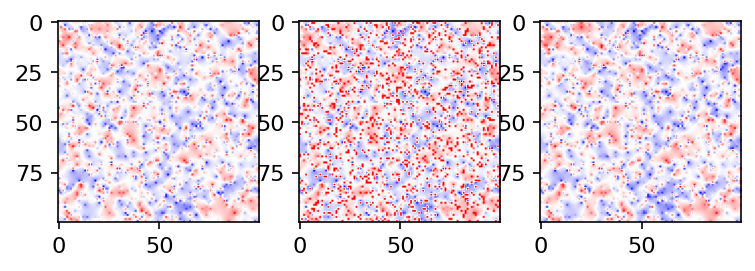

In [224]:
for s in np.arange(105, 106):
    sample = attitude_shock_data.query("scope == 'global'")\
        .query("directionality == 'constant'")\
        .query("`n shocked` == 1000").query("seed == @s")

    before = sample.query("step == 390").get("attitude").values[0]
    shock = sample.query("step == 400").get("attitude").values[0]
    after = sample.query("step == 800").get("attitude").values[0]

    print(di_vec(after).sum() - di_vec(before).sum())
    m2 = di_vec(after).sum()
    m1 = di_vec(before).sum()
    plt.plot([m1-m1, m2-m1])

fig, ax = plt.subplots(1, 3)
ax[0].imshow(before.reshape(100, 100), cmap="bwr")
ax[1].imshow(shock.reshape(100, 100), cmap="bwr")
ax[2].imshow(after.reshape(100, 100), cmap="bwr")

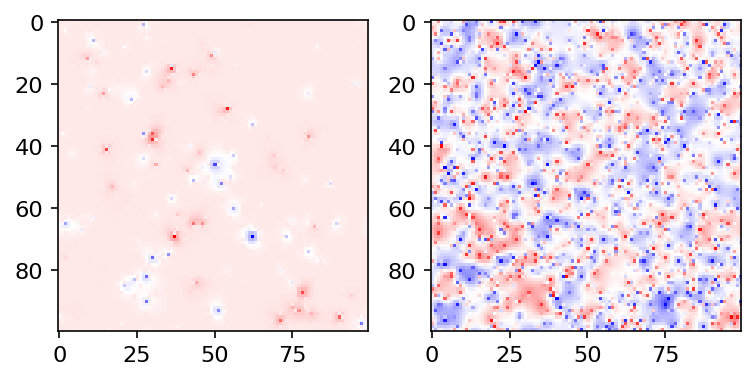